In [1]:
import configparser
import pandas as pd
import numpy as np

config = configparser.ConfigParser()
config.read('settings.ini')

max_count = int(config['Main']['vis_count'])
dataset_path = config['Main']['output_folder'] + '/' + config['Main']['output_file_s1']

print('Dataset path: ' + dataset_path)

Dataset path: ./output/dataset_s1.csv


In [2]:
df = pd.read_csv(dataset_path)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,FileName,FileDir,Emotion,Intensity,AudioLength,SampleRate
0,1010_IEO_DIS_MD.wav,./datasets/CREMA-D/AudioWAV,disgust,medium,3.036375,16000
1,1076_WSI_ANG_XX.wav,./datasets/CREMA-D/AudioWAV,angry,unknown,2.802812,16000
2,03-01-05-01-02-01-19.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,angry,medium,3.303313,48000
3,1005_ITH_DIS_XX.wav,./datasets/CREMA-D/AudioWAV,disgust,unknown,3.737062,16000
4,03-01-02-02-02-02-11.wav,./datasets/Ravdess/audio_speech_actors_01-24/A...,calm,high,3.837167,48000


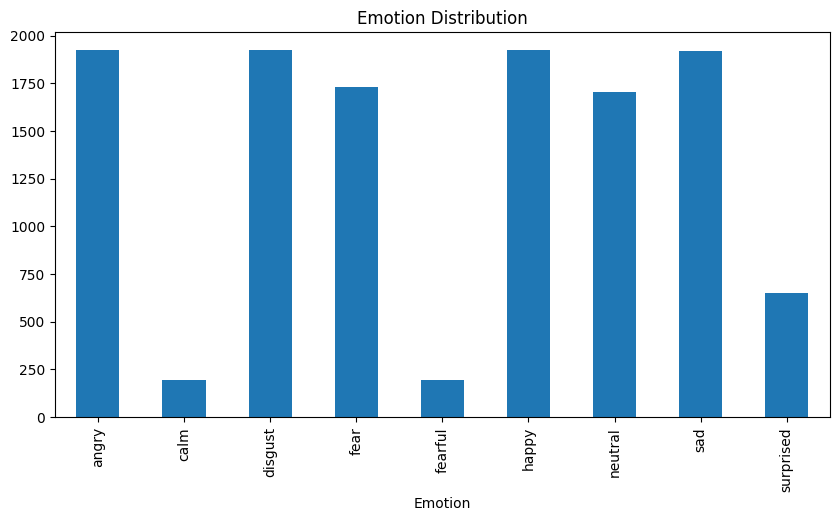

In [3]:
graph = df.groupby(['Emotion']).count()['FileName'].plot.bar(figsize=(10, 5), title='Emotion Distribution')

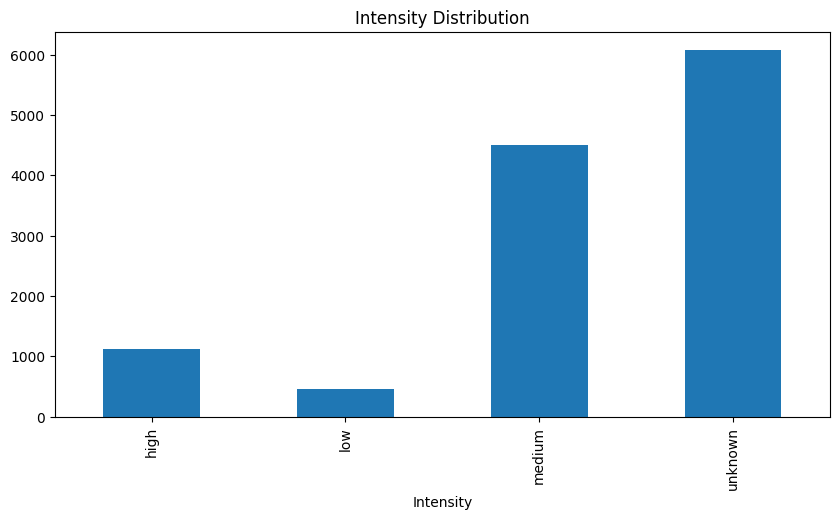

In [4]:
graph2 = df.groupby(['Intensity']).count()['FileName'].plot.bar(figsize=(10, 5), title='Intensity Distribution')

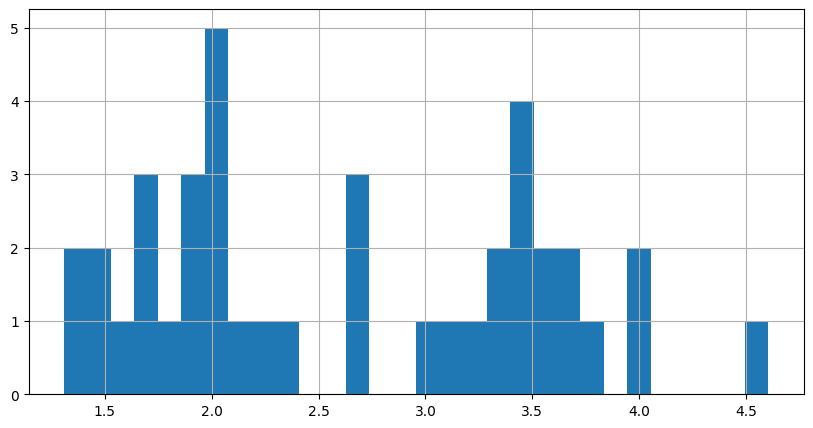

In [5]:
# AudioLength Histogram
graph3 = df['AudioLength'].hist(figsize=(10, 5), bins=30)

In [6]:
# Max audio length
print('Max audio length: ' + str(df['AudioLength'].max()))

# Min audio length
print('Min audio length: ' + str(df['AudioLength'].min()))

#90% percentile
print('90% percentile: ' + str(df['AudioLength'].quantile(0.90)))

Max audio length: 4.604285714285714
Min audio length: 1.3083067092651757
90% percentile: 3.7069429421768705


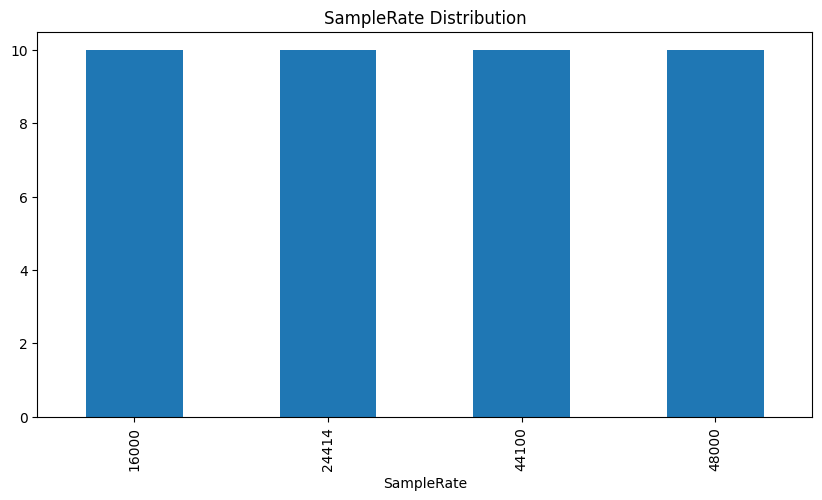

In [7]:
# SampleRate Bar Chart
graph4 = df.groupby(['SampleRate']).count()['FileName'].plot.bar(figsize=(10, 5), title='SampleRate Distribution')

In [8]:
dataset_path = config['Main']['output_folder'] + '/' + config['Main']['output_file_s2']
df = pd.read_csv(dataset_path)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Emotion,Intensity,AudioLength,file
0,fear,medium,1.727124,./output/datasets_v1/OAF_back_fear.wav
1,angry,medium,2.725351,./output/datasets_v1/DC_a04.wav
2,angry,high,1.935250,./output/datasets_v1/1001_IEO_ANG_HI.wav
3,angry,medium,2.635937,./output/datasets_v1/1001_IEO_ANG_MD.wav
4,angry,medium,3.500000,./output/datasets_v1/DC_a01.wav


In [9]:
import matplotlib.pyplot as plt
import librosa

In [10]:
# Get audio waveforms
def get_audio_waveform(row):
    data, sr = librosa.load(row['file'], sr=None)
    return data

df['data'] = df.apply(get_audio_waveform, axis=1)

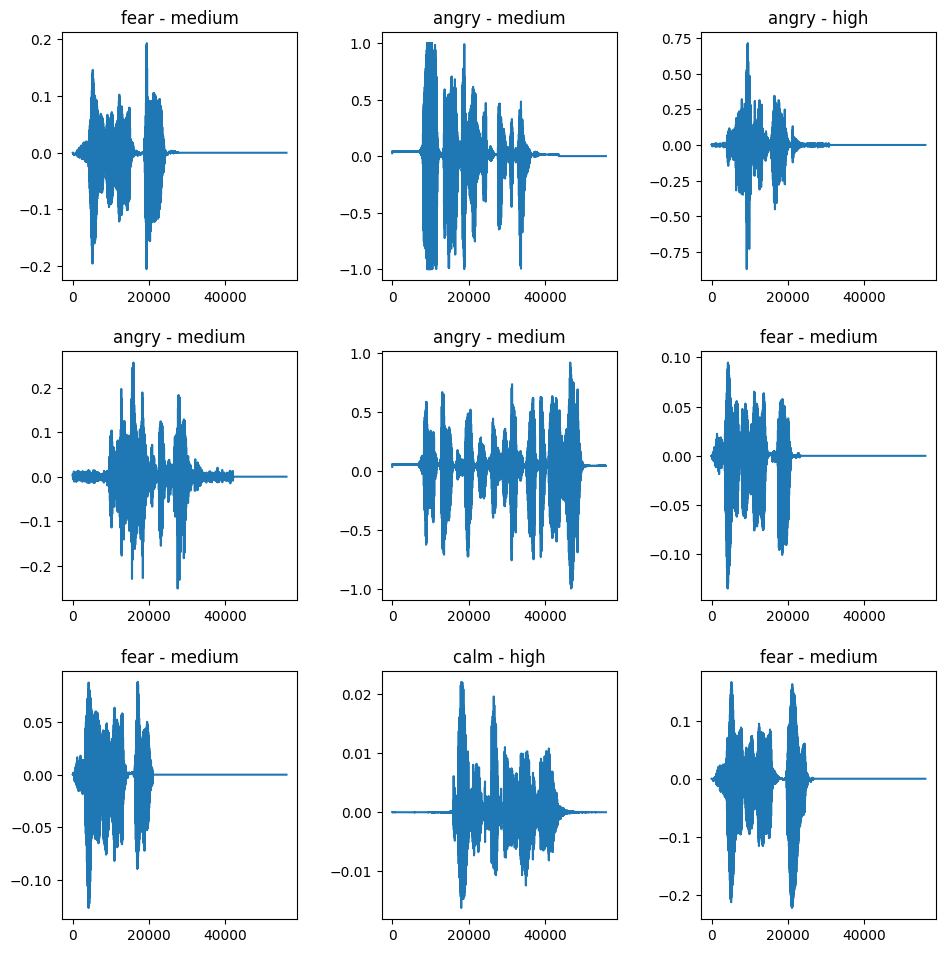

In [11]:
# Draw audio waveforms as subplots

fig, axs = plt.subplots(int(max_count/3), int(max_count/3), figsize=(10, 10))
fig.tight_layout(pad=3.0)

for i in range(max_count):
    axs[int(i/3)][i % 3].set_title(df.iloc[i]['Emotion'] + ' - ' + df.iloc[i]['Intensity'])
    axs[int(i/3)][i % 3].plot(df['data'].iloc[i])

In [12]:
from functions import noise, stretch, shift, pitch, cutoffs, convert_to_mfcc_extra, convert_to_mel_spectrogram, convert_to_mfcc, convert_to_spectrogram
import IPython.display as ipd

In [13]:
def draw(data):
    ipd.display(ipd.Audio(data, rate=16000))

    fig, axs = plt.subplots(2, 3, figsize=(10, 5))

    # Draw audio waveform
    axs[0, 0].set_title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Original')
    axs[0, 0].plot(data)

    # Draw Spectrogram
    data_spectrogram = convert_to_spectrogram(data)
    axs[0, 1].set_title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Spectrogram')
    axs[0, 1].imshow(np.abs(data_spectrogram), aspect='auto', origin='lower')

    # Draw Mel Spectrogram
    data_mel_spectrogram = convert_to_mel_spectrogram(data)
    axs[0, 2].set_title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - Mel Spectrogram')
    axs[0, 2].imshow(np.abs(data_mel_spectrogram), aspect='auto', origin='lower')

    # Draw MFCC
    data_mfcc = convert_to_mfcc(data)
    axs[1, 0].set_title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'] + ' - MFCC')
    axs[1, 0].imshow(np.abs(data_mfcc), aspect='auto', origin='lower')

    # Draw MFCC Extra
    data_mfcc_extra = convert_to_mfcc_extra(data)
    axs[1, 1].set_title(df.iloc[3]['Emotion'] + ' - ' + df.iloc[3]['Intensity'])
    axs[1, 1].imshow([np.abs(data_mfcc_extra)], aspect='auto', origin='lower')

    fig.tight_layout(pad=3.0)
    fig.show()

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


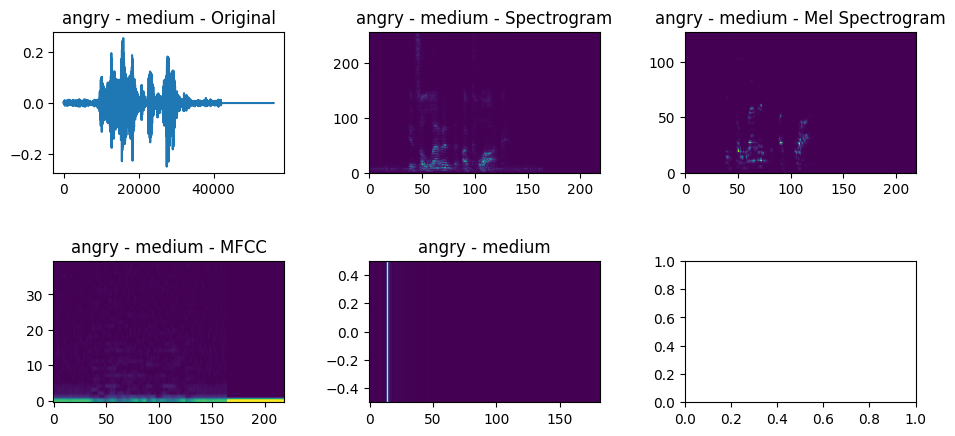

In [14]:
data = get_audio_waveform(df.iloc[3])
draw(data)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


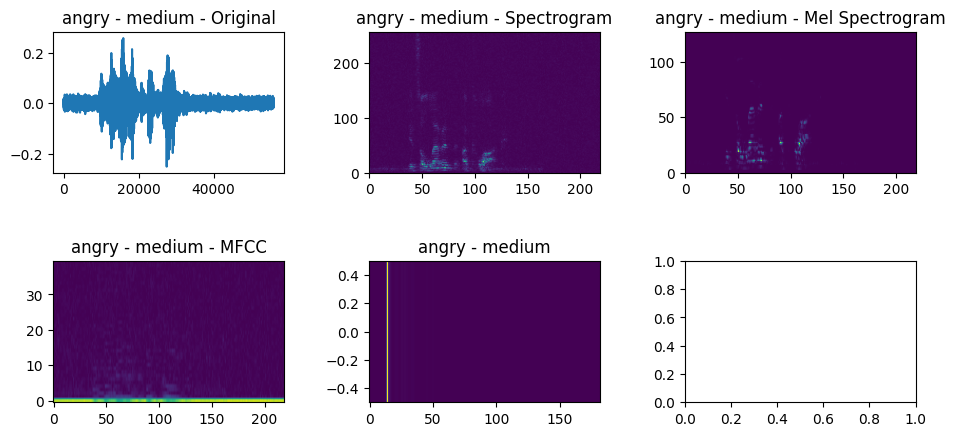

In [15]:
# Noise
data_n = noise(data)
draw(data_n)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


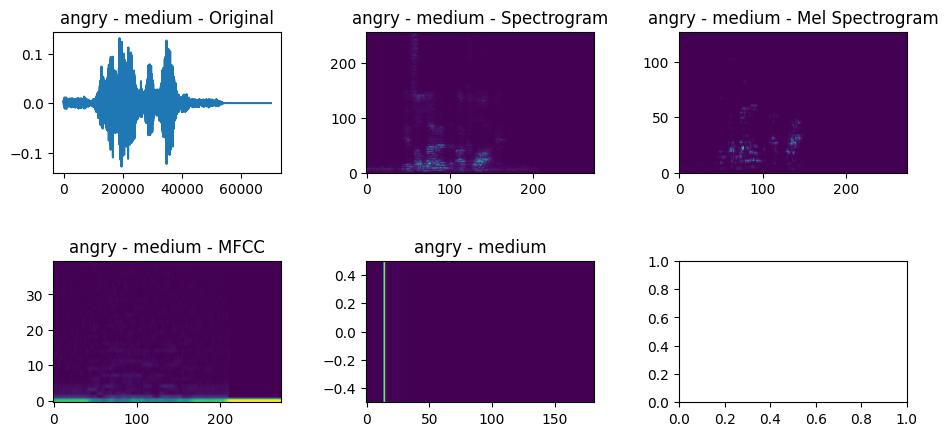

In [16]:
# Stretch
data_s = stretch(data)
draw(data_s)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


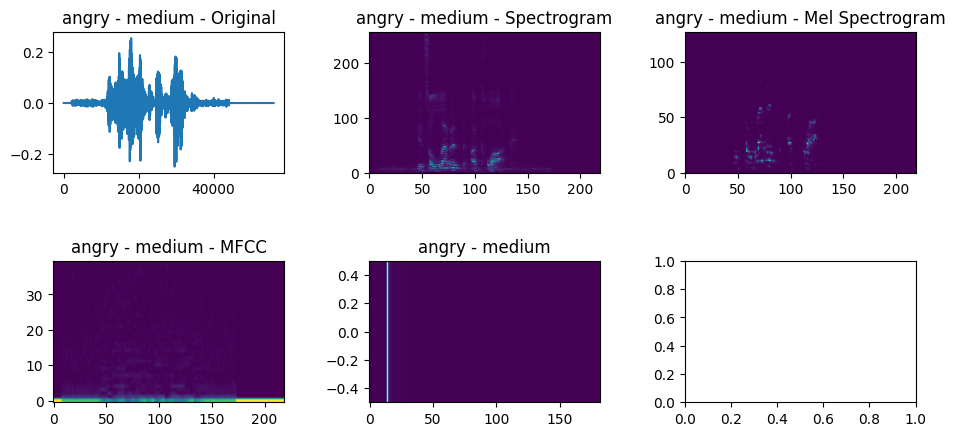

In [17]:
# Shift
data_sh = shift(data)
draw(data_sh)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


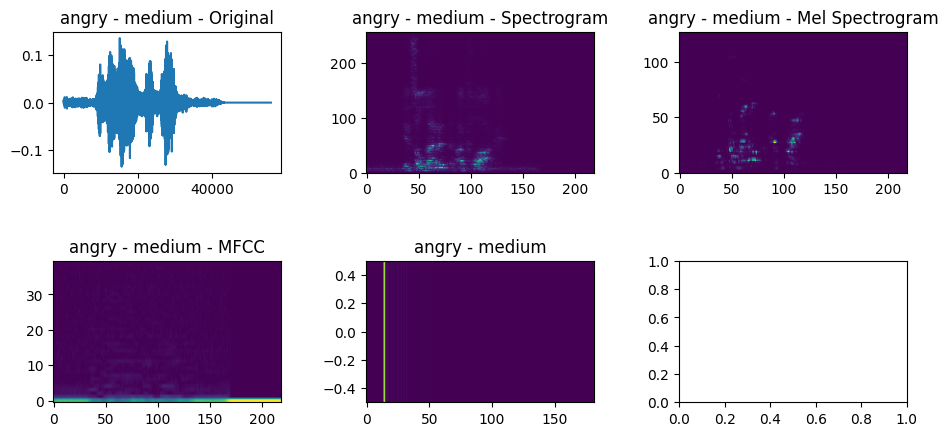

In [18]:
# Pitch
data_p = pitch(data, 16000)
draw(data_p)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


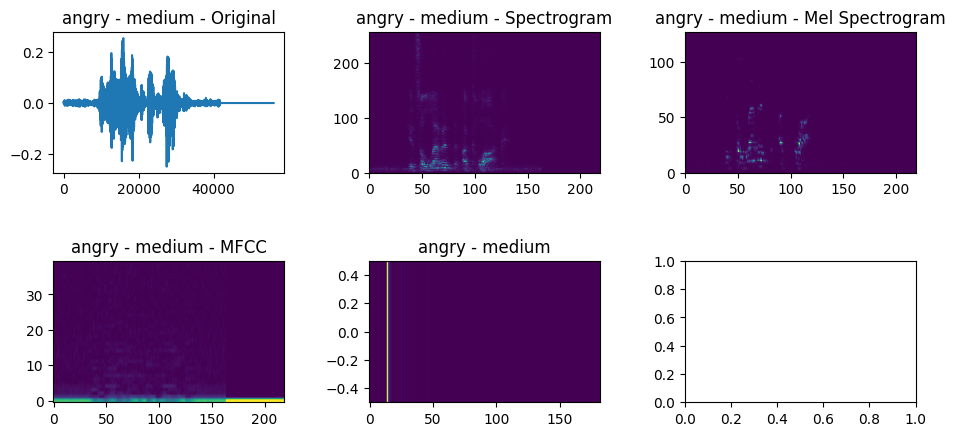

In [19]:
# Cutoffs
data_c = cutoffs(data)
draw(data_c)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


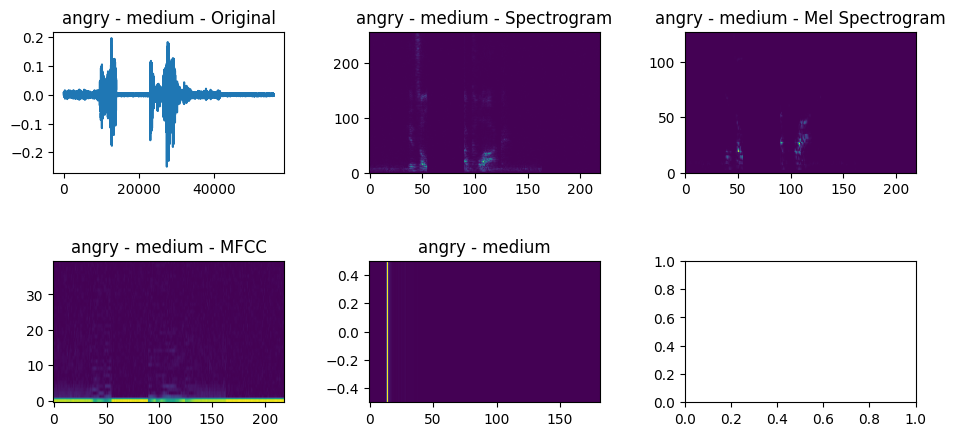

In [20]:
# CutOffs + Noise
data_cn = noise(cutoffs(data))
draw(data_cn)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


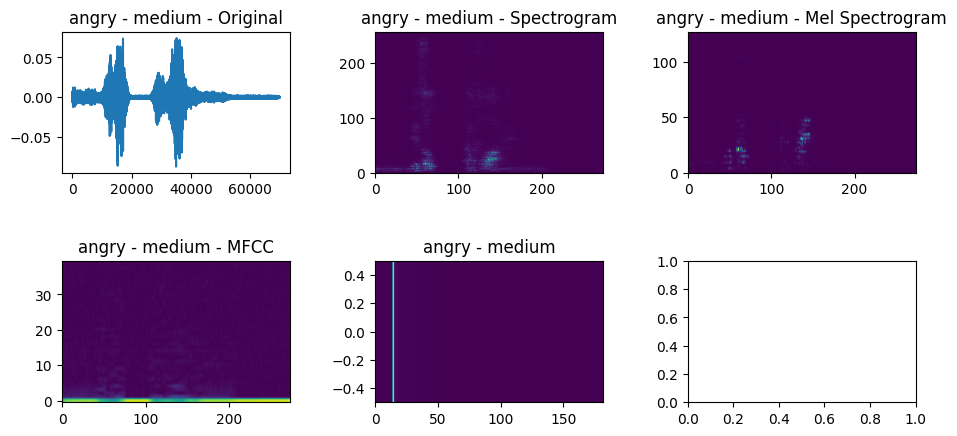

In [21]:
# Noise + Pitch + Stretch
data_nps = stretch(pitch(noise(data), 16000))
draw(data_nps)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


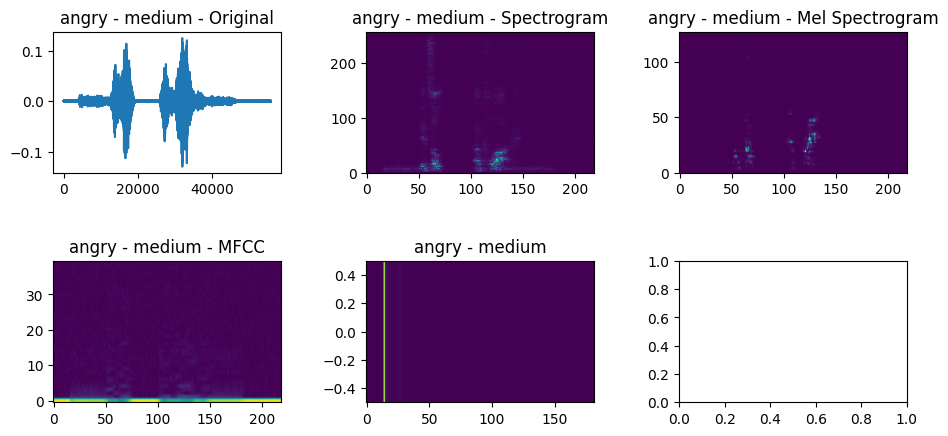

In [22]:
# Noise + Pitch + Shift
data_nph = shift(pitch(noise(data), 16000))
draw(data_nph)

/tmp/ipykernel_26561/2962230107.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


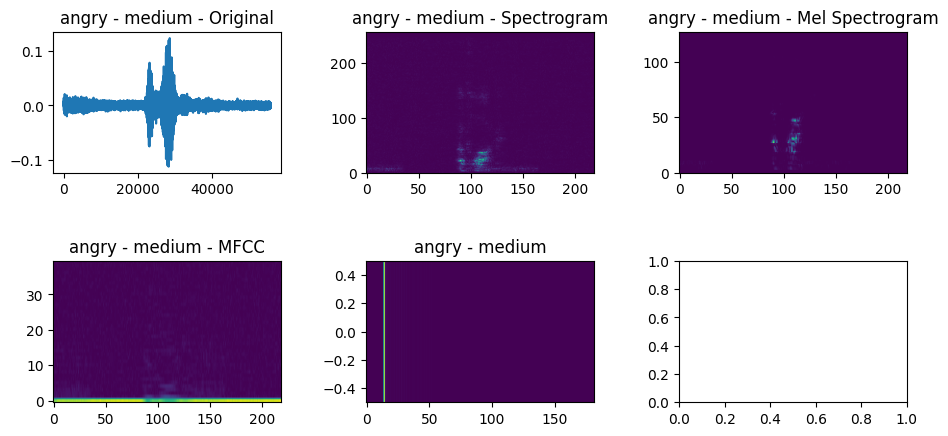

In [23]:
# CutOffs + Noise + Pitch
data_cnp = pitch(noise(cutoffs(data)), 16000)
draw(data_cnp)